## Import Packages

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as stt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 18

mpl_color = plt.rcParams['axes.prop_cycle'].by_key()['color']

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Jet Energy Response Parameters

In [3]:
x_min, x_max = 20, 60
E_min = 10

In [4]:
def mu(x, x0):
    return x + 5*np.log(np.exp(x0/10) + np.exp(x/10)) - 5*np.log(1+np.exp((x0+x)/10))

x0 = 25

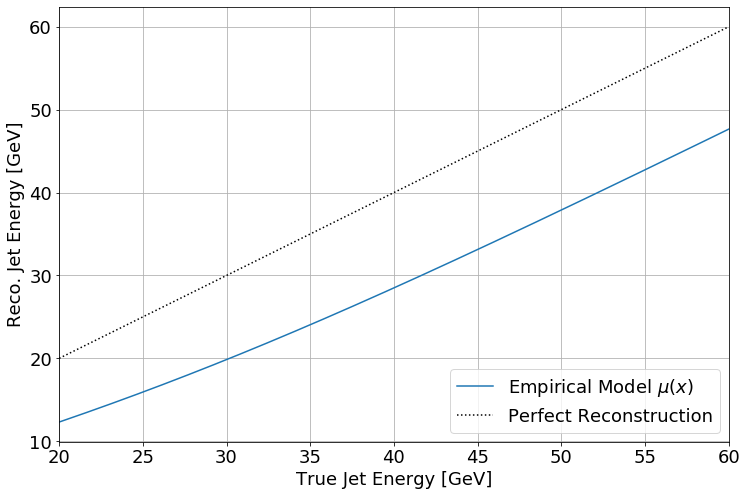

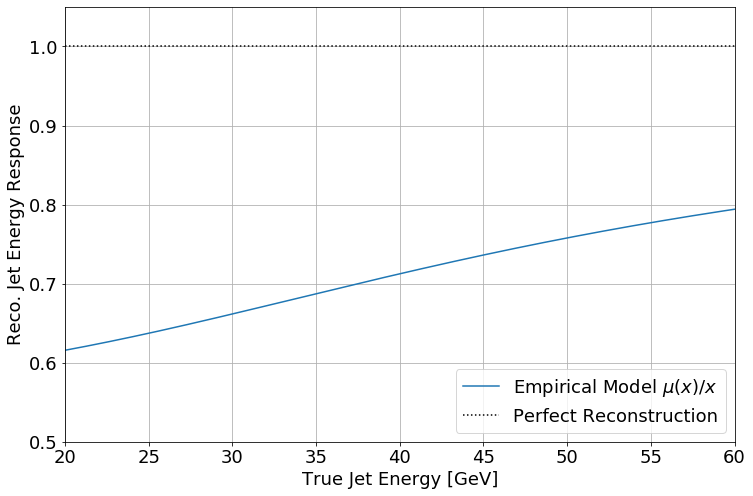

In [5]:
x_range = np.linspace(x_min, x_max, 500)

plt.plot(x_range, mu(x_range, x0), label=r"Empirical Model $\mu(x)$")
plt.plot([x_min, x_max], [x_min, x_max], linestyle=':', c='k', label="Perfect Reconstruction")
plt.xlim([x_min, x_max])
plt.xlabel(r"True Jet Energy [GeV]")
plt.ylabel(r"Reco. Jet Energy [GeV]")
plt.legend(loc='lower right')
plt.grid()
plt.savefig("./fig/jet_response.png",
            bbox_inches="tight", dpi=400)
plt.show()

plt.plot(x_range, mu(x_range, x0) / x_range, label=r"Empirical Model $\mu(x) / x$")
plt.plot([x_min, x_max], [1, 1], linestyle=':', c='k', label="Perfect Reconstruction")
plt.xlim([x_min, x_max])
plt.ylim([0.5, 1.05])
plt.xlabel(r"True Jet Energy [GeV]")
plt.ylabel(r"Reco. Jet Energy Response")
plt.legend(loc='lower right')
plt.grid()
plt.savefig("./fig/jet_relative_response.png",
            bbox_inches="tight", dpi=400)
plt.show()

In [6]:
def sigma(x, N, S, C):
    return np.sqrt(N**2 + x*S**2 + (C*x)**2)

N = 4
S = 0.6
C = 0.05

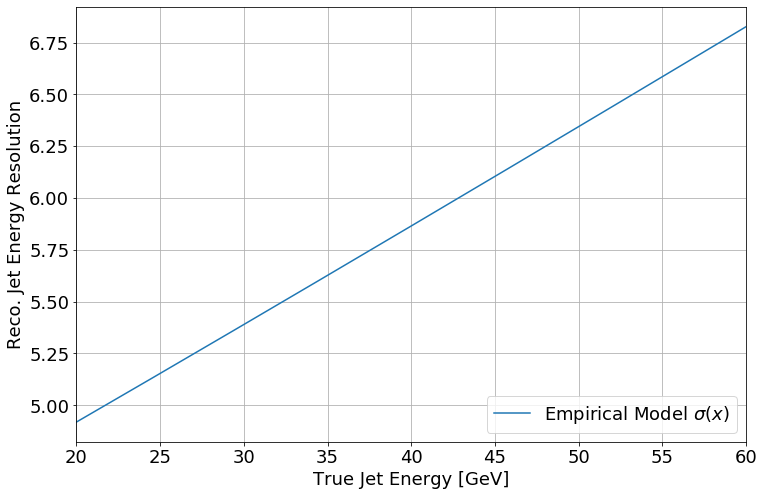

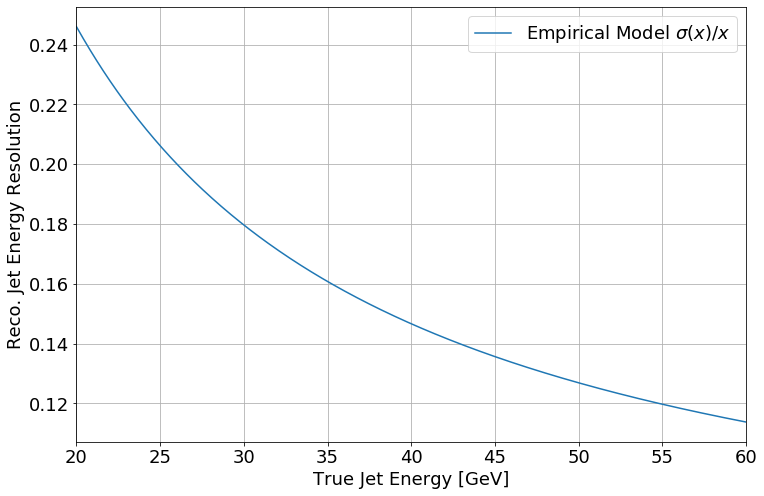

In [7]:
plt.plot(x_range, sigma(x_range, N, S, C), label=r"Empirical Model $\sigma(x)$")
plt.xlim([x_min, x_max])
# plt.ylim([0.06, 0.27])
plt.xlabel(r"True Jet Energy [GeV]")
plt.ylabel(r"Reco. Jet Energy Resolution")
plt.legend(loc='lower right')
plt.grid()
plt.savefig("./fig/jet_resolution.png",
            bbox_inches="tight", dpi=400)
plt.show()

plt.plot(x_range, sigma(x_range, N, S, C) / x_range, label=r"Empirical Model $\sigma(x) / x$")
plt.xlim([x_min, x_max])
# plt.ylim([0.06, 0.27])
plt.xlabel(r"True Jet Energy [GeV]")
plt.ylabel(r"Reco. Jet Energy Resolution")
plt.legend(loc='upper right')
plt.grid()
plt.savefig("./fig/jet_relative_resolution.png",
            bbox_inches="tight", dpi=400)
plt.show()

In [8]:
x_mean_range = []
for x_val in x_range:
    mu_val = mu(x_val, x0)
    sigma_val = sigma(x_val, N, S, C)
    x_mean_range.append(stt.truncnorm(a=(E_min-mu_val)/sigma_val, b=np.inf, loc=mu_val, scale=sigma_val).stats(moments='m'))

x_mean_range = np.array(x_mean_range)

/home/scheong/anaconda3/envs/cs231n/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:6434: RuntimeWarning: invalid value encountered in multiply
  mu2 = 1 + (a*pA - b*pB) / d - mu*mu


In [9]:
def truncated_CB_mean(beta, m, mu, sigma, lb, ub=np.inf):
    return stt.crystalball(beta=beta, m=m, loc=mu, scale=sigma).expect(lambda val: val, lb=lb, ub=ub) \
            / stt.crystalball(beta=beta, m=m, loc=mu, scale=sigma).expect(lambda val: 1, lb=lb, ub=ub)

x_mean_range = []
for x_val in x_range:
    mu_val = mu(x_val, x0)
    sigma_val = sigma(x_val, N, S, C)
    x_mean_range.append(truncated_CB_mean(1.5, 2, mu_val, sigma_val, E_min))

x_mean_range = np.array(x_mean_range)

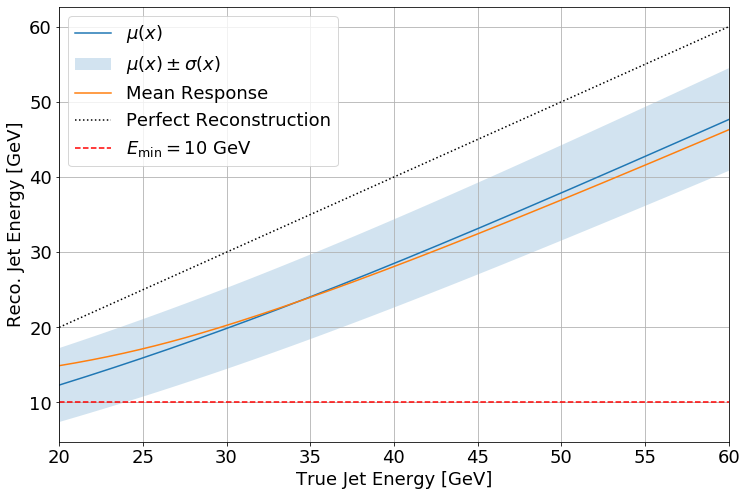

In [10]:
plt.plot([x_min, x_max], [x_min, x_max],
         linestyle=':', c='k', label="Perfect Reconstruction")
plt.plot(x_range, mu(x_range, x0), label=r"$\mu(x)$")
plt.plot(x_range, x_mean_range, label=r"Mean Response")
plt.fill_between(x_range, mu(x_range, x0)-sigma(x_range,N,S,C), mu(x_range, x0)+sigma(x_range,N,S,C),
                 label=r"$\mu(x) \pm \sigma(x)$", alpha=0.2)
plt.axhline(E_min, linestyle='--', c='r', label=r"$E_\mathrm{min}=%d~$GeV" % E_min)
plt.xlim([x_min, x_max])
plt.xlabel("True Jet Energy [GeV]")
plt.ylabel("Reco. Jet Energy [GeV]")
plt.grid()

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 4, 2, 0, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig("./fig/jet_response_overall.png",
            bbox_inches="tight", dpi=400)
plt.show()

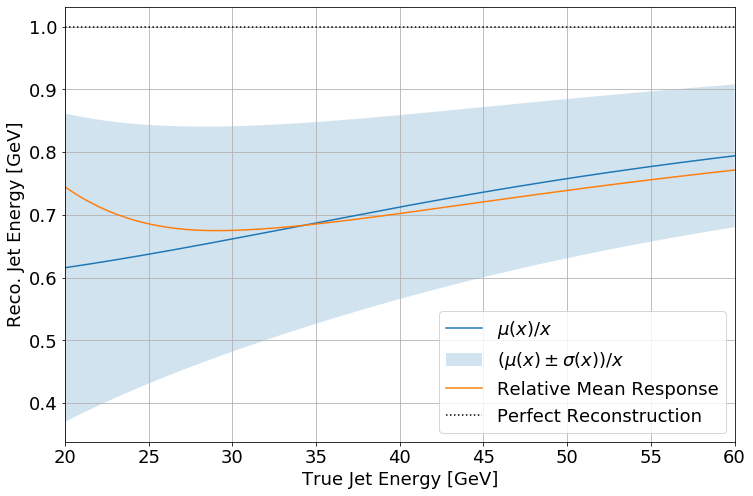

In [11]:
plt.plot([x_min, x_max], [1, 1],
         linestyle=':', c='k', label="Perfect Reconstruction")
plt.plot(x_range, mu(x_range, x0) / x_range, label=r"$\mu(x) / x$")
plt.plot(x_range, x_mean_range / x_range, label=r"Relative Mean Response")
plt.fill_between(x_range, (mu(x_range, x0)-sigma(x_range,N,S,C))/x_range, (mu(x_range, x0)+sigma(x_range,N,S,C))/x_range,
                 label=r"$(\mu(x) \pm \sigma(x))/x$", alpha=0.2)
plt.xlim([x_min, x_max])
plt.xlabel("True Jet Energy [GeV]")
plt.ylabel("Reco. Jet Energy [GeV]")
plt.grid()

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 3, 2, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc='lower right')

plt.savefig("./fig/jet_relative_response_overall.png",
            bbox_inches="tight", dpi=400)
plt.show()

## Generate MC Samples

In [12]:
N_data = int(5e5)
N_gen = int(1.2 * N_data)

In [13]:
np.random.seed(789)

x_data = stt.uniform.rvs(loc=x_min, scale=x_max-x_min, size=N_gen)
z_data = stt.crystalball.rvs(beta=1.5, m=2, size=N_gen)
y_data = z_data * sigma(x_data, N, S, C) + mu(x_data, x0)

In [14]:
ind = np.argwhere(y_data > E_min)
print(np.sum(y_data > E_min))

x_data = x_data[ind].flatten()
y_data = y_data[ind].flatten()

537302


In [15]:
x_data = x_data[:N_data]
y_data = y_data[:N_data]

np.save("./toy_data/jet_data_N%d_CBtest.npy" % (N_data), np.vstack((x_data, y_data)))

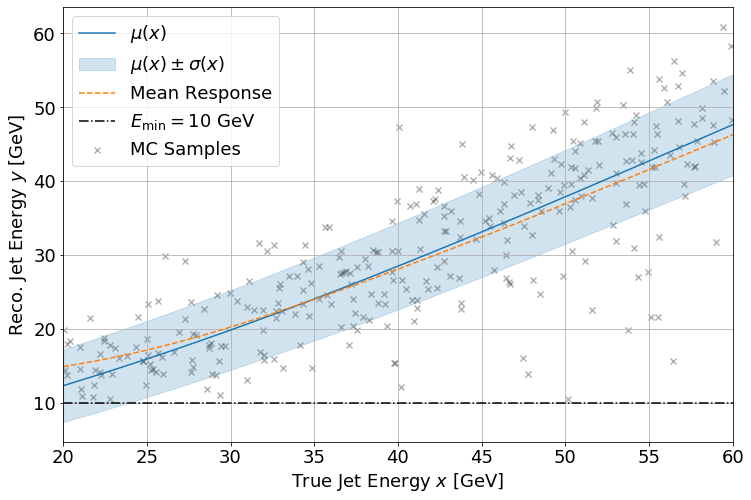

In [16]:
n_plot = 300

plt.scatter(x_data[:n_plot], y_data[:n_plot],
            c='k', alpha=0.3, marker='x', label="MC Samples")
plt.axhline(E_min, linestyle='-.', color='k', label=r"$E_\mathrm{min}=%d~$GeV" % E_min)
plt.plot(x_range, mu(x_range, x0), label=r"$\mu(x)$")
plt.fill_between(x_range, mu(x_range, x0)-sigma(x_range,N,S,C), mu(x_range, x0)+sigma(x_range,N,S,C),
                 color=mpl_color[0], label=r"$\mu(x) \pm \sigma(x)$", alpha=0.2)
plt.plot(x_range, x_mean_range,
         c=mpl_color[1], linestyle='--', label="Mean Response")


plt.xlim([x_min, x_max])
plt.xlabel(r"True Jet Energy $x$ [GeV]")
plt.ylabel(r"Reco. Jet Energy $y$ [GeV]")
plt.grid()

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 4, 2, 0, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig("./fig/jet_energy_samples.png",
            bbox_inches="tight", dpi=400)
plt.show()

## Train NN's

Import deep-learning package

In [38]:
import keras

import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, ReLU, ELU, PReLU
from keras.callbacks import ModelCheckpoint

print("Using Keras version:", keras.__version__)

Using Keras version: 2.2.4


In [128]:
def scale(data, loc, scale):
    return (data - loc) / scale

def back_scale(data, loc, scale):
    return data * scale + loc

In [136]:
x_data, y_data = np.load("./toy_data/jet_data_N%d_CBtest.npy" % (N_data))

x_data = np.vstack((x_data, x_data**3)).T
    
x_loc, x_scale = np.mean(x_data, axis=0), np.std(x_data, axis=0)
y_loc, y_scale = np.mean(y_data), np.std(y_data)

In [130]:
n_repeat = 25

### Mean-learning NN

In [143]:
mean_NN_results = []

for i in range(n_repeat):
    
    print("Iteration %d: Starting..." % (i+1))

    mean_NN = Sequential([
        Dense(50, input_shape=(2,)),
        PReLU(),
        Dense(1)
    ])
    mean_cp = ModelCheckpoint("./NN_weights/jet_mean_NN_n%d_test.hdf5" % (i+1),
                              monitor='loss',
                              verbose=False,
                              save_best_only=True,
                              mode='min')
    mean_NN.compile(optimizer='adam',
                    loss='mse',)
    
    print("Iteration %d: Training..." % (i+1))
    
    mean_NN_history = mean_NN.fit(scale(x_data, x_loc, x_scale),
                                  scale(y_data, y_loc, y_scale),
                                  epochs=50, batch_size=int(N_data/20),
                                  callbacks=[mean_cp],
                                  verbose=False)
    
    print("Iteration %d: Evaluating..." % (i+1))

    mean_NN.load_weights("./NN_weights/jet_mean_NN_n%d_test.hdf5" % (i+1))

    mean_NN_results.append(back_scale(mean_NN.predict(scale(np.vstack((x_range, x_range**3)).T, x_loc, x_scale)), y_loc, y_scale).flatten())
    
    print("Iteration %d: Complete!\n" % (i+1))

mean_NN_results = np.array(mean_NN_results)

Iteration 1: Starting...
Iteration 1: Training...
Iteration 1: Evaluating...
Iteration 1: Complete!

Iteration 2: Starting...
Iteration 2: Training...
Iteration 2: Evaluating...
Iteration 2: Complete!

Iteration 3: Starting...
Iteration 3: Training...
Iteration 3: Evaluating...
Iteration 3: Complete!

Iteration 4: Starting...
Iteration 4: Training...
Iteration 4: Evaluating...
Iteration 4: Complete!

Iteration 5: Starting...
Iteration 5: Training...
Iteration 5: Evaluating...
Iteration 5: Complete!

Iteration 6: Starting...
Iteration 6: Training...
Iteration 6: Evaluating...
Iteration 6: Complete!

Iteration 7: Starting...
Iteration 7: Training...
Iteration 7: Evaluating...
Iteration 7: Complete!

Iteration 8: Starting...
Iteration 8: Training...
Iteration 8: Evaluating...
Iteration 8: Complete!

Iteration 9: Starting...
Iteration 9: Training...
Iteration 9: Evaluating...
Iteration 9: Complete!

Iteration 10: Starting...
Iteration 10: Training...
Iteration 10: Evaluating...
Iteration 1

### Mode-learning NN

In [42]:
def lgk_loss(y_true, y_pred, h=1e-1, alpha=1e-6):
    return -K.exp(-0.5*(y_true - y_pred)**2 / h**2) / np.sqrt(2*np.pi) / h + 1 + alpha*K.abs(y_true-y_pred)

def exp_sink_loss(y_true, y_pred, h=1e-1, alpha=1e-6):
    return -K.exp(-K.abs(y_true - y_pred) / h) + 1

In [145]:
h = 0.1

mode_NN_results = []

for i in range(n_repeat):
    
    print("Iteration %d: Starting..." % (i+1))

    mode_NN = Sequential([
        Dense(50, input_shape=(2,)),
        PReLU(),
        Dense(1)
    ])
    mode_cp = ModelCheckpoint("./NN_weights/jet_mode_NN_n%d.hdf5" % (i+1),
                              monitor='loss',
                              verbose=False,
                              save_best_only=True,
                              mode='min')
    mode_NN.compile(optimizer='adam',
                    loss=lambda y_true, y_pred: lgk_loss(y_true, y_pred, h=h, alpha=1e-4))
    
    print("Iteration %d: Training..." % (i+1))
    
    mode_NN_history = mode_NN.fit(scale(x_data, x_loc, x_scale),
                                  scale(y_data, y_loc, y_scale),
                                  epochs=50, batch_size=int(N_data/20),
                                  callbacks=[mode_cp],
                                  verbose=False)
    
    print("Iteration %d: Evaluating..." % (i+1))

    mode_NN.load_weights("./NN_weights/jet_mode_NN_n%d.hdf5" % (i+1))

    mode_NN_results.append(back_scale(mode_NN.predict(scale(np.vstack((x_range, x_range**3)).T, x_loc, x_scale)), y_loc, y_scale).flatten())
    
    print("Iteration %d: Complete!\n" % (i+1))

mode_NN_results = np.array(mode_NN_results)

Iteration 1: Starting...
Iteration 1: Training...
Iteration 1: Evaluating...
Iteration 1: Complete!

Iteration 2: Starting...
Iteration 2: Training...
Iteration 2: Evaluating...
Iteration 2: Complete!

Iteration 3: Starting...
Iteration 3: Training...
Iteration 3: Evaluating...
Iteration 3: Complete!

Iteration 4: Starting...
Iteration 4: Training...
Iteration 4: Evaluating...
Iteration 4: Complete!

Iteration 5: Starting...
Iteration 5: Training...
Iteration 5: Evaluating...
Iteration 5: Complete!

Iteration 6: Starting...
Iteration 6: Training...
Iteration 6: Evaluating...
Iteration 6: Complete!

Iteration 7: Starting...
Iteration 7: Training...
Iteration 7: Evaluating...
Iteration 7: Complete!

Iteration 8: Starting...
Iteration 8: Training...
Iteration 8: Evaluating...
Iteration 8: Complete!

Iteration 9: Starting...
Iteration 9: Training...
Iteration 9: Evaluating...
Iteration 9: Complete!

Iteration 10: Starting...
Iteration 10: Training...
Iteration 10: Evaluating...
Iteration 1

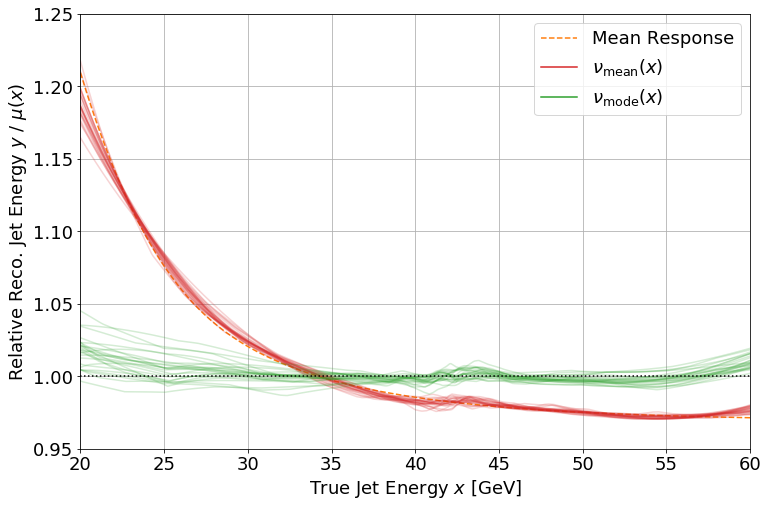

In [166]:
mean_plot = plt.plot(x_range, x_mean_range / mu(x_range, x0),
                     c=mpl_color[1], linestyle='--', label="Mean Response")

plt.plot([], [],
         c=mpl_color[3], alpha=1, label=r"$\nu_\mathrm{mean}(x)$")
for i in range(n_repeat):
    plt.plot(x_range, mean_NN_results[i] / mu(x_range, x0),
             c=mpl_color[3], alpha=0.2)

plt.plot([], [],
         c=mpl_color[2], alpha=1, label=r"$\nu_\mathrm{mode}(x)$")
for i in range(n_repeat):
    plt.plot(x_range, mode_NN_results[i] / mu(x_range, x0),
             c=mpl_color[2], alpha=0.2)

plt.axhline(1, c='k', linestyle=':')

plt.xlim([x_range[0], x_range[-1]])
plt.ylim([0.95, 1.25])
plt.xlabel(r"True Jet Energy $x$ [GeV]")
plt.ylabel(r"Relative Reco. Jet Energy $y ~/~ \mu(x)$")
plt.grid()

plt.legend()

plt.savefig("./fig/jet_energy_response_all_NNs.png",
            bbox_inches="tight", dpi=400)
plt.show()

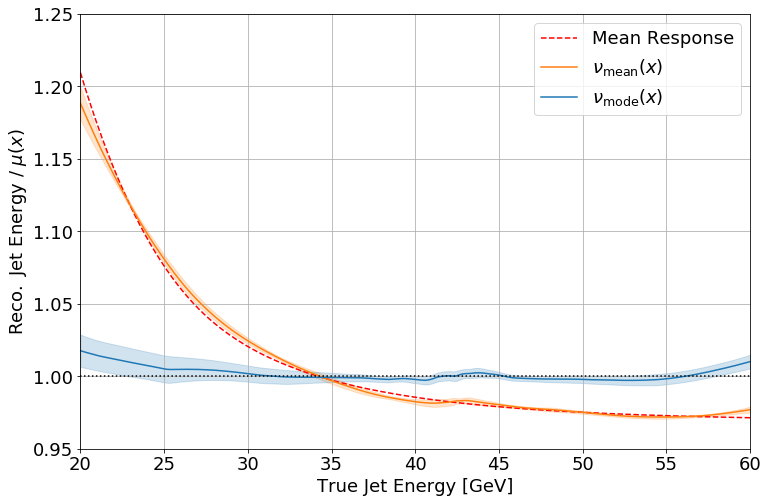

In [147]:
plt.plot(x_range, x_mean_range / mu(x_range, x0),
         c='r', linestyle='--', label="Mean Response")
plt.plot(x_range, np.mean(mean_NN_results, axis=0).flatten() / mu(x_range, x0),
         c=mpl_color[1], label=r"$\nu_\mathrm{mean}(x)$")
plt.fill_between(x_range,
                 (np.mean(mean_NN_results, axis=0)-np.std(mean_NN_results, axis=0, ddof=1)).flatten() / mu(x_range, x0),
                 (np.mean(mean_NN_results, axis=0)+np.std(mean_NN_results, axis=0, ddof=1)).flatten() / mu(x_range, x0),
                 color=mpl_color[1], alpha=0.2)

plt.plot(x_range, np.mean(mode_NN_results, axis=0).flatten() / mu(x_range, x0),
         c=mpl_color[0], label=r"$\nu_\mathrm{mode}(x)$")
plt.fill_between(x_range,
                 (np.mean(mode_NN_results, axis=0)-np.std(mode_NN_results, axis=0, ddof=1)).flatten() / mu(x_range, x0),
                 (np.mean(mode_NN_results, axis=0)+np.std(mode_NN_results, axis=0, ddof=1)).flatten() / mu(x_range, x0),
                 color=mpl_color[0], alpha=0.2)

plt.axhline(1, c='k', linestyle=':')

plt.xlim([x_range[0], x_range[-1]])
plt.ylim([0.95, 1.25])
plt.xlabel(r"True Jet Energy [GeV]")
plt.ylabel(r"$\mathrm{Reco.~Jet~Energy} ~/~ \mu(x)$")
plt.grid()

plt.legend()

plt.savefig("./fig/jet_energy_response_final_result.png",
            bbox_inches="tight", dpi=400)
plt.show()

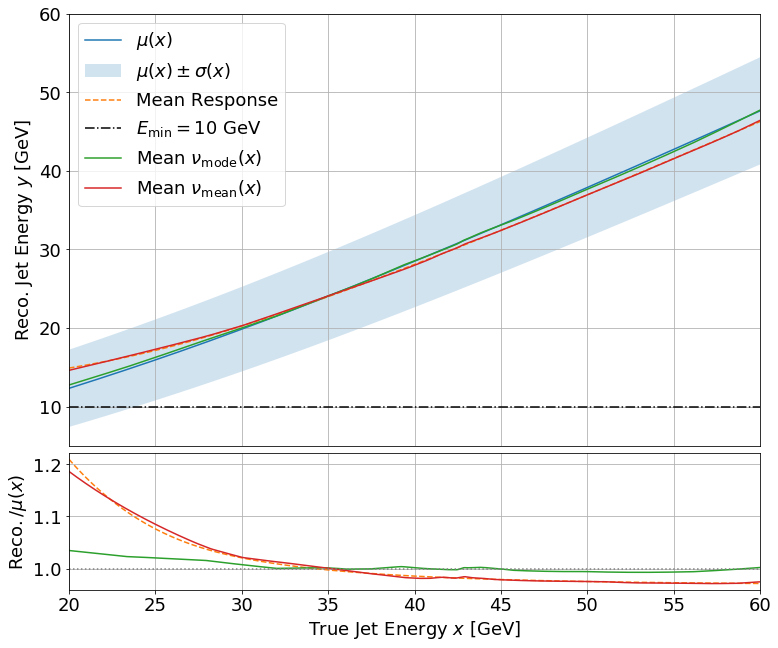

In [160]:
fig = plt.figure(figsize=[12, 10])
ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])
for tic in ax1.xaxis.get_major_ticks():
    tic.tick1line.set_visible(False)
    tic.tick2line.set_visible(False)
    tic.label1.set_visible(False)
    tic.label2.set_visible(False)
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.19])



ax1.plot(x_range, mu(x_range, x0), label=r"$\mu(x)$")
ax1.fill_between(x_range, mu(x_range, x0)-sigma(x_range,N,S,C), mu(x_range, x0)+sigma(x_range,N,S,C),
                 label=r"$\mu(x) \pm \sigma(x)$", alpha=0.2)
ax1.axhline(E_min, linestyle='-.', color='k', label=r"$E_\mathrm{min}=%d~$GeV" % E_min)
ax1.plot(x_range, x_mean_range,
         linestyle='--', label=r"Mean Response")
ax1.plot(x_range, back_scale(mode_NN.predict(scale(np.vstack((x_range, x_range**3)).T, x_loc, x_scale)), y_loc, y_scale).flatten(),
         label=r"Mean $\nu_\mathrm{mode}(x)$")
ax1.plot(x_range, back_scale(mean_NN.predict(scale(np.vstack((x_range, x_range**3)).T, x_loc, x_scale)), y_loc, y_scale).flatten(),
         label=r"Mean $\nu_\mathrm{mean}(x)$")


ax2.plot(x_range, (x_mean_range) / mu(x_range, x0),
         linestyle='--', c=mpl_color[1])
ax2.plot(x_range, (back_scale(mode_NN.predict(scale(np.vstack((x_range, x_range**3)).T, x_loc, x_scale)), y_loc, y_scale).flatten()) / mu(x_range, x0),
         c=mpl_color[2])
ax2.plot(x_range, (back_scale(mean_NN.predict(scale(np.vstack((x_range, x_range**3)).T, x_loc, x_scale)), y_loc, y_scale).flatten()) / mu(x_range, x0),
         c=mpl_color[3])
ax2.axhline(1, c='gray', linestyle=':')

ax1.set_xlim([x_min, x_max])
ax2.set_xlim([x_min, x_max])
ax1.set_ylim([5, 60])
ax2.set_xlabel(r"True Jet Energy $x$ [GeV]")
ax1.set_ylabel(r"Reco. Jet Energy $y$ [GeV]")
ax2.set_ylabel(r"$\mathrm{Reco.} / \mu(x)$")
ax1.grid()
ax2.grid()

handles, labels = ax1.get_legend_handles_labels()
order = [0, 5, 2, 1, 3, 4]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig("./fig/jet_energy_response_final_result.png",
            bbox_inches="tight", dpi=400)
plt.show()